In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

DAYS_FOR_MTH = 20

raw_re = pd.read_excel("../rawdata/rawREValue.xls", header=10)

raw_re = raw_re.loc[raw_re['WILLRESIND'] > 0]
raw_re = raw_re.rename(columns={"observation_date": "OBSERVATION_DATE"}, errors="raise")
raw_re.reset_index(inplace=True)
# Only using data after 1996-01-31 because dates before that only have one value per month
raw_re = raw_re.loc[raw_re['OBSERVATION_DATE'] >= dt.datetime(1996,1,31)]
raw_re['MONTHLY_RETURNS'] = raw_re['WILLRESIND'].pct_change(DAYS_FOR_MTH)
real_estate = raw_re[["OBSERVATION_DATE", "WILLRESIND", "MONTHLY_RETURNS"]]
np.save('real_estate.npy', real_estate.to_numpy())


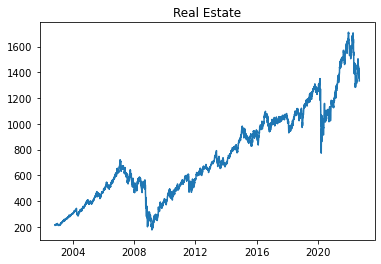

In [7]:
fig, axis = plt.subplots(1)

x, y = real_estate.iloc[:,0], real_estate.iloc[:, 1] 
axis.plot(x, y)
axis.set_title("Real Estate")
plt.show()

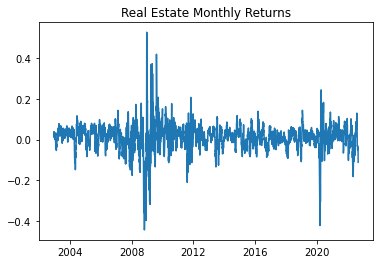

In [8]:

fig, axis = plt.subplots(1)
x, y = real_estate.iloc[:,0], real_estate.iloc[:, 2]
axis.plot(x, y)
axis.set_title("Real Estate Monthly Returns")
plt.show()

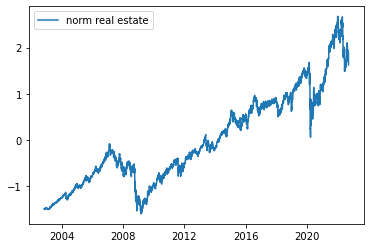

In [9]:
def normalise_df(df):
    return (df-df.mean())/df.std()

sliced_re = real_estate.iloc[:, 1]
dates = real_estate.iloc[:, 0]
norm_re = normalise_df(sliced_re)

plt.plot(dates, norm_re, label= "norm real estate")
plt.legend()